# __PREDICITION BULLDOZER PRICES FOR AUCTION__

#### Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.
>
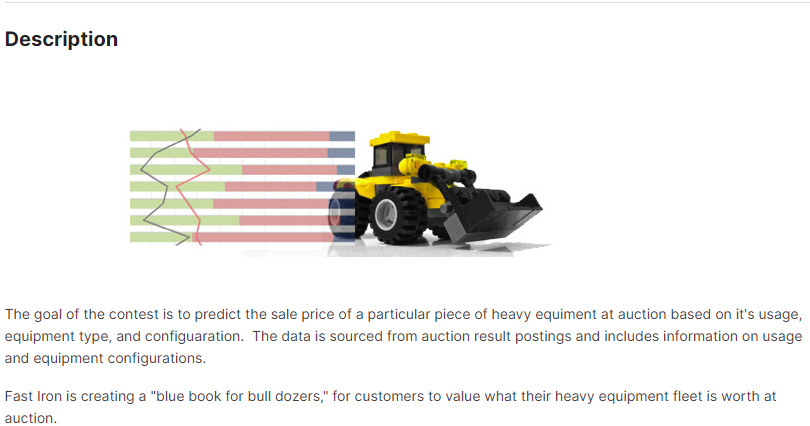



YI/edit?usp=sharing



In [309]:
#importing all the required library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import pygwalker as pg


In [310]:
df=pd.read_csv("Data/TrainAndValid/TrainAndValid.csv",low_memory=False)


#this library(below) creates a tableu like dashboard  for dynamic data visualization

#pg.walk(df_temp)    

### __Viewing our DataFrame__

In [311]:
df.head()      

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [313]:
df.isna().sum()                                                #show us the number of null values in a particular coloumn 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

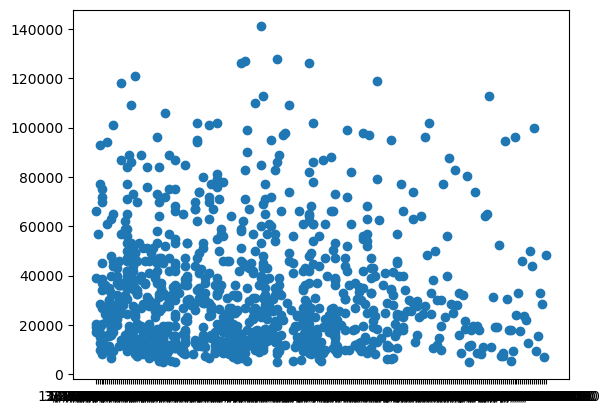

In [314]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);



###  __WORKING WITH TIME SERIES DATA__

In [315]:
df.saledate                       #object

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

### __We will convert this data object into another pandas  datatime object using `parse_date`__

In [316]:
df = pd.read_csv("Data/TrainAndValid/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [317]:
df.saledate               

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [318]:
df["saledate"].dtype                                      #            ('<M8[ns]') == datetime64[ns]

dtype('<M8[ns]')

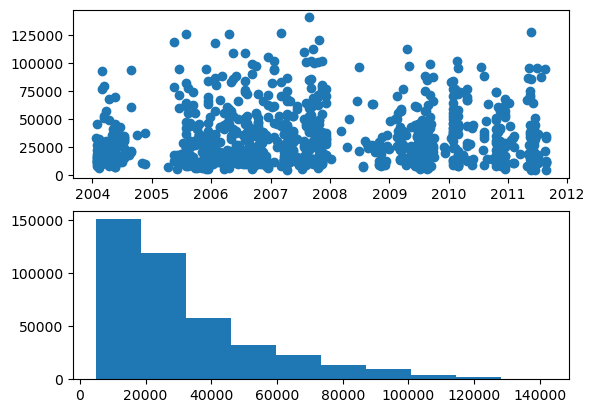

In [319]:
fig,(ax,ax1) = plt.subplots(2,1)
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);
ax1.hist(df["SalePrice"]);

In [320]:
# count=0
# print(len(df.columns))
# for label ,content in df.items():
#     if (df[label].dtype==object):
#         count+=1
#         print(label)
# print(f'Number of coloumn having data in the form of object = {count}')

In [321]:
df.head().T        #T gives us transpose like view

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


###  __WHEN WE WORK WITH TIME SERIES DATA ,ITS A GOOD IDEA TO SORT THE DATE__


 
#### __Extracting  year, month, day, as seperate columns__

In [322]:
 df.sort_values(by=["saledate"],inplace=True)    #sorts the date and dataframe 

In [323]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [324]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### At this point we will make a copy of our data set 

In [325]:
df_temp= df.copy()

In [326]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


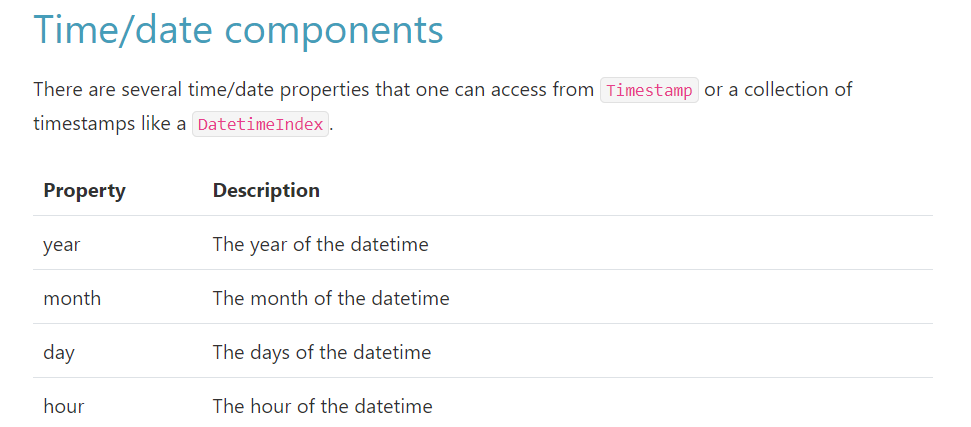


In [327]:
df_temp["saledate"].dt.year                    # AS WE HAVE OUR SALEDATE AS A SPECIAL DATATYPE WE CAN USE INBUILT  FUNCTION
                                               

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int32

#### __EXTRACTING YEAR, DAY, MONTH FROM THE DATE__

In [328]:


df_temp["sale_year"]=df_temp["saledate"].dt.year

df_temp["sale_month"]=df_temp["saledate"].dt.month

df_temp["sale_day"]=df_temp["saledate"].dt.day

df_temp["sale_dayofweek"]=df_temp["saledate"].dt.dayofweek

df_temp["sale_dayofyear"]=df_temp["saledate"].dt.dayofyear






In [329]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [330]:
df_temp["sale_dayofweek"][:5]

205615    1
274835    1
141296    1
212552    1
62755     1
Name: sale_dayofweek, dtype: int32

### now we can drop our sale date coloumn 

In [331]:
df_temp.drop("saledate",axis=1,inplace=True)

### we lets find out which state has maximum sales

In [332]:
df_temp["state"].head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: object

In [333]:
df_temp["state"].unique()

array(['Texas', 'Florida', 'Georgia', 'South Carolina', 'Oklahoma',
       'Pennsylvania', 'Arizona', 'Washington', 'Nevada', 'New Jersey',
       'Colorado', 'California', 'Indiana', 'Maryland', 'Utah',
       'New Mexico', 'Wyoming', 'New York', 'Illinois', 'Missouri',
       'Connecticut', 'Kentucky', 'Louisiana', 'Tennessee', 'Minnesota',
       'Montana', 'North Dakota', 'Oregon', 'Kansas', 'Alabama', 'Maine',
       'Ohio', 'Virginia', 'Delaware', 'New Hampshire', 'Mississippi',
       'Iowa', 'Wisconsin', 'North Carolina', 'Vermont', 'Alaska',
       'Idaho', 'Nebraska', 'Arkansas', 'Rhode Island', 'South Dakota',
       'Unspecified', 'Puerto Rico', 'West Virginia', 'Massachusetts',
       'Michigan', 'Hawaii', 'Washington DC'], dtype=object)

In [334]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# __TURNING  DATA INTO NUMBERS__

### __we will convert all non-numeric data into numeric data__ 

## convert string into categories 

### 1. finding out which column contain strings

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

### __CONVERTING INTO CATEGORICAL DATA TYPE__

In [336]:
for key,value in df_temp.items():
    if pd.api.types.is_object_dtype(value):
        
        df_temp[key]= value.astype("category").cat.as_ordered()

In [337]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [338]:
df_temp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

### All the catgeoriecal datatype have been assigned a code (encoding a string)

In [339]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [340]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [341]:
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving the data (checkpoint)

In [342]:
df_super_temp=df_temp.copy()

# __Filling in missing values__ 

### 1. Filling out numeric missing values

In [343]:
# finding out numerical columns

for key,value in df_temp.items():
    if pd.api.types.is_numeric_dtype(value):
        print(key)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale_year
sale_month
sale_day
sale_dayofweek
sale_dayofyear


In [344]:
# finding out which of the above columns have missing values 

for key,value in df_temp.items():
    if pd.api.types.is_numeric_dtype(value):
        if(df_temp[key].isna().sum()>0):
            print(key)
    

auctioneerID
MachineHoursCurrentMeter


In [345]:
# filling out above cloumn with median values

# why median (median is more robust then mean why??)

# median is more robust in nature then mean to outliers


for key,value in df_temp.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            
            df_temp[key+"_is_missing_"]=pd.isnull(value) #this acts as a record that we replaced the missing values 
            
            df_temp[key]=value.fillna(value.median())
            
            

In [346]:
df_temp.auctioneerID.isna().sum()  #cross checking 

0

### 2. Filling out categorical missing values

### As we have converted our strings into categorical type we will use the codes assigned to strings as our numerical data

In [347]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True, categories_dtype=object)

In [348]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [349]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [350]:
# finding out columns with missing categorical value

# creating extra columns to 

for key ,value in df_temp.items():
    if pd.api.types.is_categorical_dtype(value):
        if df_temp[key].isna().sum()>=0:
            
            df_temp[key+"is_missing"]=pd.isnull(value)
            
            df_temp[key]=pd.Categorical(value).codes + 1           # why do we put a +1 there ?? to remove the -1 (-1 indicates  a mising value ) in codes 

import warnings
warnings.filterwarnings('ignore')   # trying to get rid of warnings

In [351]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [352]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

#### Now our data is completely filled 

In [353]:
df_temp.columns.isna().sum()  # this line of code takes each column  finds all the null values and sums them up 

0

# __MODELLING__ 

In [354]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


### BASELINE MODEL

In [355]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=7)

model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])


        
       

RandomForestRegressor(n_jobs=-1, random_state=7)

In [356]:
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875705773876126

### __Question__ :  Is this metric relaiable ?

#### (our data imported from start has train and validation, we have seperate csv for test 
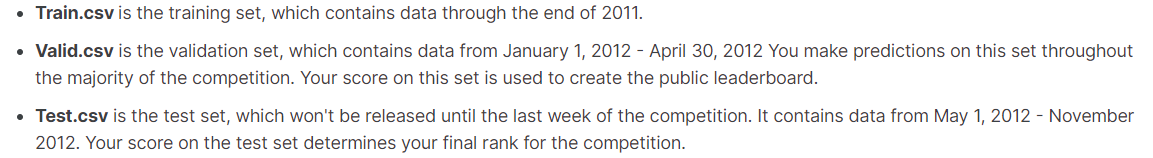

In [357]:
df_temp.sale_year.value_counts()

sale_year
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

### creating a validation set 

In [358]:
# we are divided the data into validation and training set 
df_val = df_temp[df_temp["sale_year"]==2012]

df_train =df_temp[df_temp["sale_year"]!=2012]

In [359]:
len(df_val), len(df_train)


(11573, 401125)

In [360]:
X_train ,y_train =df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid ,y_valid =df_val.drop("SalePrice", axis=1), df_val.SalePrice

len(X_train),len(y_train)

(401125, 401125)

## __EVALUATION__


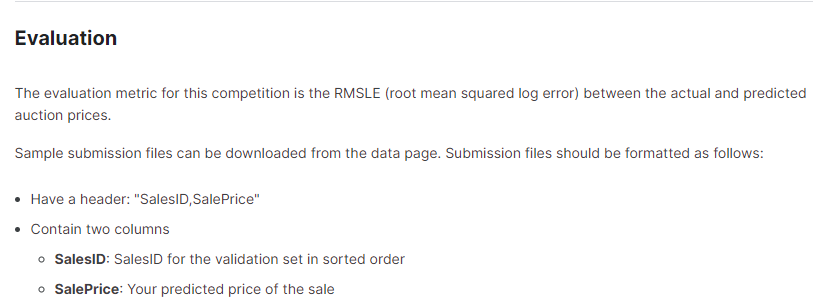

#### __CREATING A CUSTOM EVALUTION FUNCTION__

In [361]:
from sklearn.metrics  import mean_squared_log_error,mean_absolute_error,r2_score
def evalution_function(y_test,y_preds):
    
    return np.sqrt((mean_squared_log_error(y_test,y_preds)))

def shows_scores(model):
    train_preds=model.predict(X_train)

    valid_preds=model.predict(X_valid)

    scores= {"trianing_rmsle":evalution_function(y_train,train_preds),
    "valid_rmsle":evalution_function(y_valid,valid_preds),
    "training_r2":r2_score(y_train,train_preds),
    "vaild_r2":r2_score(y_valid,valid_preds)
    }
    return scores
    
    
    

In [362]:
shows_scores(model)

{'trianing_rmsle': 0.08420070450972182,
 'valid_rmsle': 0.08646545338204661,
 'training_r2': 0.9875662250365038,
 'vaild_r2': 0.9873889214737583}

#### Testing on a subset of data (just to get hyperparameters)

In [363]:
%%time            # gives the amount of time required to execute a cell

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [364]:
model.n_estimators   # you can consider each n_estimators as a small model 

100

In [365]:
model =  RandomForestRegressor(n_jobs=-1,random_state=4,max_samples=10000)

In [366]:
%%time 
model.fit(X_train,y_train)

#model.fit(X_train,y_train)


CPU times: total: 1min 20s
Wall time: 9.46 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=4)

In [367]:
shows_scores(model)

{'trianing_rmsle': 0.25715181250800145,
 'valid_rmsle': 0.29321230582141306,
 'training_r2': 0.8605003948479151,
 'vaild_r2': 0.8317053588595675}

### __Hyperparameter tunning using RandomizedCV__

In [368]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           "min_samples_leaf":np.arange(2,20,2),
           "max_samples":[10000]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=45),
                             param_distributions=rs_grid,
                             cv=5,
                             n_iter=5,
                             verbose=True
                              
                             )

rs_model.fit(X_train,y_train)
           
           

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 17.3 s
Wall time: 1min 48s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=45),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [369]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [370]:
shows_scores(rs_model)

{'trianing_rmsle': 0.28691982874762356,
 'valid_rmsle': 0.3091410429524295,
 'training_r2': 0.8206582521402574,
 'vaild_r2': 0.8051288229474363}

### __Training model with the best set of hyperparameters__

**Note** This parameters where found out after `n_iter =100` that may take hours (found on kaggle)

In [371]:
%%time
ideal_model = RandomForestRegressor(min_samples_leaf=1,
                                    n_estimators=40,
                                    max_features=0.5,
                                    max_samples=None,
                                    min_samples_split=14,
                                    n_jobs=-1)

ideal_model.fit(X_train,y_train)

CPU times: total: 9min 32s
Wall time: 58.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [372]:
shows_scores(ideal_model)

{'trianing_rmsle': 0.1446451566617351,
 'valid_rmsle': 0.24589787737678093,
 'training_r2': 0.9588120010319426,
 'vaild_r2': 0.88181811440344}

### Making prediction on test data

In [373]:
#importing the test data

df_test = pd.read_csv("Data/Test.csv",low_memory=False,parse_dates=["saledate"])

In [374]:
# Making predicitions on our test data using our ideal model model


# we had same number of columns but the columns are not in the same order which is giving the error

test_preds=ideal_model.predict(df_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...


In [375]:
df_test.shape

(12457, 52)

In [376]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [377]:
#test_preds = ideal_model.predict(df_test)

# error ?

# as we have train our model on different format of data we need to have same format of data while testing 

# so we need the test data to go through the same trnasformation as our train data

In [378]:
# creating a function to transform our test data

def preprocessing_testdata(df):
    #spliting up the date coloumn 
    
    df["sale_year"]=df["saledate"].dt.year

    df["sale_month"]=df["saledate"].dt.month

    df["sale_day"]=df["saledate"].dt.day

    df["sale_dayofweek"]=df["saledate"].dt.dayofweek

    df["sale_dayofyear"]=df["saledate"].dt.dayofyear


    df.drop("saledate",axis=1,inplace=True)


    #filling in missing data and turning them into numbers

    for key,value in df.items():
        
        if pd.api.types.is_numeric_dtype(value):
            if pd.isnull(value).sum():
            
                df[key+"_is_missing_"]=pd.isnull(value) #this acts as a record that we replaced the missing values 
            
        
                df[key]=value.fillna(value.median())

        if not pd.api.types.is_numeric_dtype(value):
            
            
            df[key+"is_missing"]=pd.isnull(value)

            # we add +1 to catgeorical code because panda encodes a missing catgeroy into -1
            df[key]=pd.Categorical(value).codes+1

    return df

In [379]:
#tranforming out test data set to match our trianing data set 
df_test=preprocessing_testdata(df_test)

In [380]:
df_test.shape

(12457, 101)

In [381]:
X_train.shape

(401125, 102)

In [382]:
# our df_test has 101 columns and our X_train has 102 there is one missing column in df_test 

#finding out that missing columns 

set(X_train.columns) -set(df_test.columns)

{'auctioneerID_is_missing_'}

In [383]:
#manually adding the column in our df_test

df_test['auctioneerID_is_missing_']=False

In [384]:
df_test.shape

(12457, 102)

In [385]:
X_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [386]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Typeis_missing,True,True,True,True,False
Travel_Controlsis_missing,True,True,True,True,False
Differential_Typeis_missing,True,False,True,True,True
Steering_Controlsis_missing,True,False,True,True,True


In [387]:
missing_columns = X_train.columns.difference(df_test.columns)


In [388]:
print(missing_columns)

Index([], dtype='object')


In [389]:
df_test_reordered = df_test[X_train.columns]


In [390]:
test_predict= ideal_model.predict(df_test_reordered)

In [391]:
test_predict

array([18048.82054468, 21450.79923229, 48142.8634107 , ...,
       14483.84721666, 17885.55440802, 28038.27182012])

In [392]:
# formatting the predictions for  submission on kaggle

df_preds=pd.DataFrame()

df_preds["SalesID"]=df_test["SalesID"]

df_preds["SalesPrice"]=test_predict

df_preds



,SalesID,SalesPrice
0,1227829,18048.820545
1,1227844,21450.799232
2,1227847,48142.863411
3,1227848,63651.391072
4,1227863,59309.302665
...,...,...
12452,6643171,43883.278035
12453,6643173,11580.392427
12454,6643184,14483.847217
12455,6643186,17885.554408


In [393]:
# exporting our prediction dataframe into a csv

df_preds.to_csv("Data/submision.csv",index=False)


#### `index=False` is used to exclude the index column when saving the DataFrame to a CSV file.

## __Feature Importance__

In [394]:
# feature importance tells  us which feature was esssential in predciting the output 

#finding importance of our ideal model

ideal_model.feature_importances_


array([3.47853347e-02, 1.81935816e-02, 4.16916417e-02, 1.88490929e-03,
       3.36787957e-03, 1.97960045e-01, 3.28759874e-03, 1.00712764e-03,
       4.19056908e-02, 4.20055756e-02, 6.58014107e-02, 4.78140650e-03,
       1.49318969e-02, 1.74366266e-01, 4.04625061e-02, 5.96943139e-03,
       2.81405382e-03, 4.62561238e-03, 3.65529590e-03, 7.24100636e-02,
       5.89075992e-04, 4.03489143e-04, 7.45163252e-04, 1.82026534e-04,
       1.14582365e-03, 5.35173252e-04, 2.18909535e-03, 1.06344567e-02,
       2.72108843e-03, 1.02395364e-04, 3.90812887e-03, 1.91337832e-03,
       3.99544284e-03, 2.31160255e-03, 2.44077972e-04, 5.37436335e-03,
       9.19016215e-04, 1.20110550e-02, 1.43592283e-03, 1.70453937e-03,
       7.90695973e-04, 1.19272198e-03, 1.47140965e-03, 6.95440625e-04,
       5.48387745e-04, 3.96910729e-04, 2.52834264e-04, 1.79602886e-03,
       1.35115037e-03, 1.99312171e-04, 3.28159823e-04, 7.39711737e-02,
       3.74835307e-03, 5.66513757e-03, 2.93017886e-03, 1.00188333e-02,
      

In [395]:
len(ideal_model.feature_importances_)

102

In [396]:
X_train.shape

(401125, 102)

In [397]:
# each number in that array corresponds to a particular 

# we'll make a graph to see which the important features 

def feature_importance(columns,importance,n=20):

    df = (pd.DataFrame({"features":columns,
                       "feature_importance":importance})
                    .sort_values("feature_importance",ascending=False)
                    .reset_index(drop=True))
    fig , ax = plt.subplots()
    ax.barh(df["features"][:n],df["feature_importance"][:20])

    ax.set_ylabel("features")

    ax.set_xlabel("feature_importance")

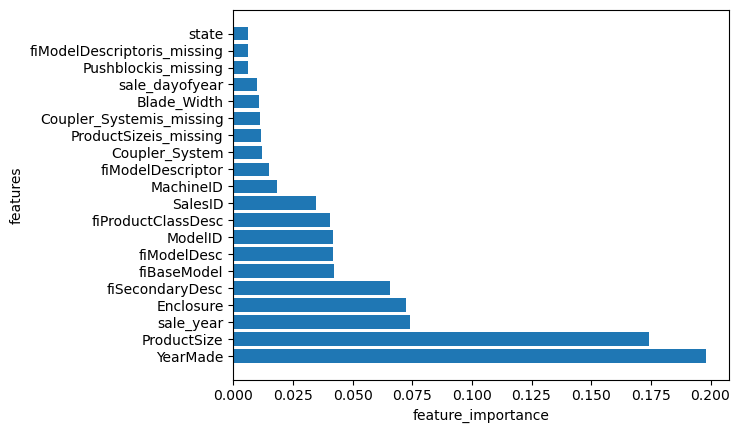

In [398]:
feature_importance(X_train.columns ,ideal_model.feature_importances_)